In [1]:
#standard ds imports
import pandas as pd
import numpy as np
#viz and stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
# .py imports
from env import user, pwd,host
import env
import wranglerer as wr
import os
#sklearn imports
from sklearn.model_selection import train_test_split
import sklearn.preprocessing
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

## ACQUIRE

In [2]:
red_df = wr.acquire_red_df()

local version found!


In [3]:
red_df['wine_color'] = 1

In [4]:
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [5]:
red_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  wine_color            1599 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 162.5 KB


In [6]:
white_df = wr.acquire_white_df()

local version found!


In [7]:
white_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [8]:
white_df['wine_color'] = 0

In [9]:
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


In [10]:
red_df.shape

(1599, 13)

In [11]:
white_df.shape

(4898, 13)

## CONCAT

In [12]:
df = wr.merge_wines_df()

local version found!
local version found!


In [13]:
df.shape

(6497, 13)

In [14]:
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,wine_color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [15]:
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'ph', 'sulphates', 'alcohol', 'quality', 'wine_color'],
      dtype='object')

## UNIVARIATE ANALYSIS

In [16]:
wr.summarize(df)

SUMMARY REPORT


Dataframe head: 
   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    ph  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  wine_color  
0      9.4        

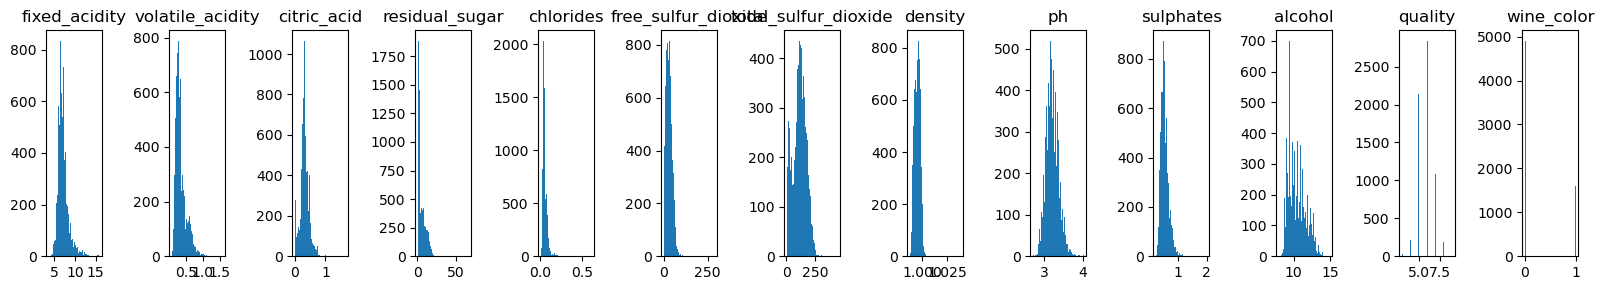

In [17]:
wr.get_hist(df)

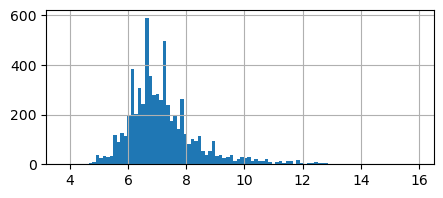

count    6497.000000
mean        7.215307
std         1.296434
min         3.800000
25%         6.400000
50%         7.000000
75%         7.700000
max        15.900000
Name: fixed_acidity, dtype: float64

In [18]:
plt.figure(figsize=(5,2))
df.fixed_acidity.hist(bins=100)
plt.show()
df.fixed_acidity.describe()

In [19]:
wr.get_upper_outliers(df.fixed_acidity).sort_values(ascending=False).head(10)

652     6.25
557     5.95
442     5.95
554     5.85
555     5.85
243     5.35
244     5.35
544     4.65
3125    4.55
374     4.35
Name: fixed_acidity, dtype: float64

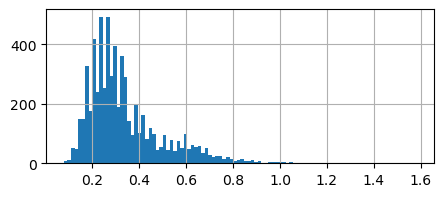

count    6497.000000
mean        0.339666
std         0.164636
min         0.080000
25%         0.230000
50%         0.290000
75%         0.400000
max         1.580000
Name: volatile_acidity, dtype: float64

In [20]:
plt.figure(figsize=(5,2))
df.volatile_acidity.hist(bins=100)
plt.show()
df.volatile_acidity.describe()

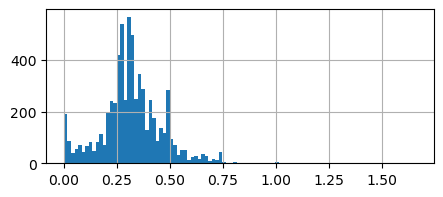

count    6497.000000
mean        0.318633
std         0.145318
min         0.000000
25%         0.250000
50%         0.310000
75%         0.390000
max         1.660000
Name: citric_acid, dtype: float64

In [21]:
plt.figure(figsize=(5,2))
df.citric_acid.hist(bins=100)
plt.show()
df.citric_acid.describe()

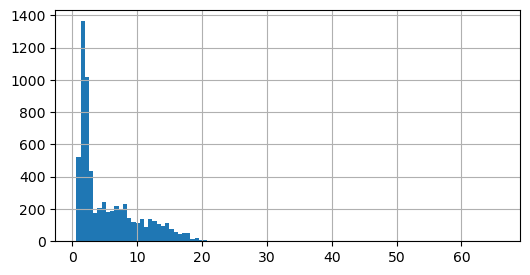

count    6497.000000
mean        5.443235
std         4.757804
min         0.600000
25%         1.800000
50%         3.000000
75%         8.100000
max        65.800000
Name: residual_sugar, dtype: float64

In [22]:
plt.figure(figsize=(6,3))
df.residual_sugar.hist(bins=100)
plt.show()
df.residual_sugar.describe()

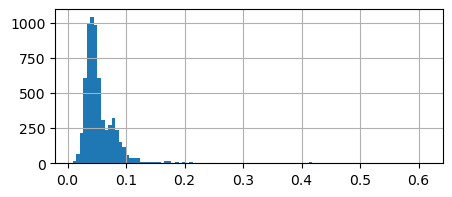

count    6497.000000
mean        0.056034
std         0.035034
min         0.009000
25%         0.038000
50%         0.047000
75%         0.065000
max         0.611000
Name: chlorides, dtype: float64

In [23]:
plt.figure(figsize=(5,2))
df.chlorides.hist(bins=100)
plt.show()
df.chlorides.describe()

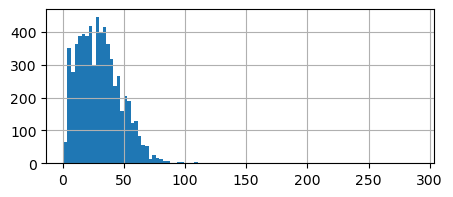

count    6497.000000
mean       30.525319
std        17.749400
min         1.000000
25%        17.000000
50%        29.000000
75%        41.000000
max       289.000000
Name: free_sulfur_dioxide, dtype: float64

In [24]:
plt.figure(figsize=(5,2))
df.free_sulfur_dioxide.hist(bins=100)
plt.show()
df.free_sulfur_dioxide.describe()

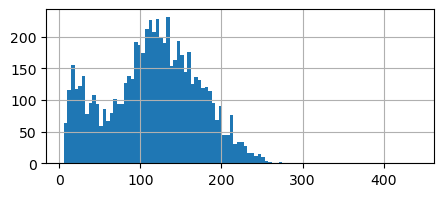

count    6497.000000
mean      115.744574
std        56.521855
min         6.000000
25%        77.000000
50%       118.000000
75%       156.000000
max       440.000000
Name: total_sulfur_dioxide, dtype: float64

In [25]:
plt.figure(figsize=(5,2))
df.total_sulfur_dioxide.hist(bins=100)
plt.show()
df.total_sulfur_dioxide.describe()

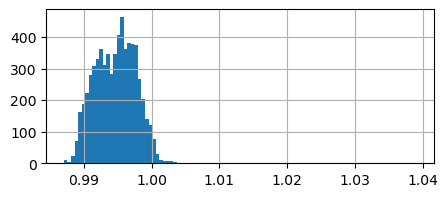

count    6497.000000
mean        0.994697
std         0.002999
min         0.987110
25%         0.992340
50%         0.994890
75%         0.996990
max         1.038980
Name: density, dtype: float64

In [26]:
plt.figure(figsize=(5,2))
df.density.hist(bins=100)
plt.show()
df.density.describe()

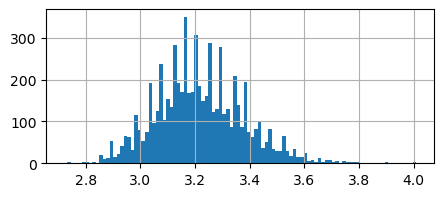

count    6497.000000
mean        3.218501
std         0.160787
min         2.720000
25%         3.110000
50%         3.210000
75%         3.320000
max         4.010000
Name: ph, dtype: float64

In [27]:
plt.figure(figsize=(5,2))
df.ph.hist(bins=100)
plt.show()
df.ph.describe()

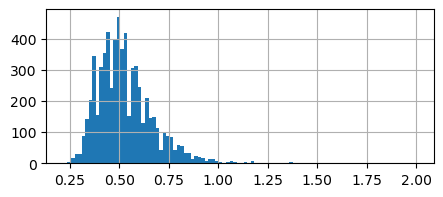

count    6497.000000
mean        0.531268
std         0.148806
min         0.220000
25%         0.430000
50%         0.510000
75%         0.600000
max         2.000000
Name: sulphates, dtype: float64

In [28]:
plt.figure(figsize=(5,2))
df.sulphates.hist(bins=100)
plt.show()
df.sulphates.describe()

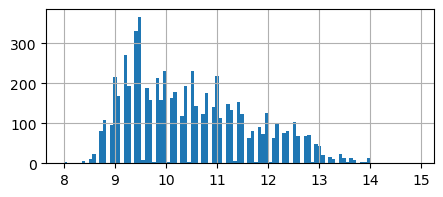

count    6497.000000
mean       10.491801
std         1.192712
min         8.000000
25%         9.500000
50%        10.300000
75%        11.300000
max        14.900000
Name: alcohol, dtype: float64

In [29]:
plt.figure(figsize=(5,2))
df.alcohol.hist(bins=100)
plt.show()
df.alcohol.describe()

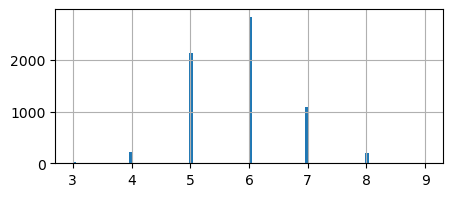

3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: quality, dtype: int64

In [30]:
plt.figure(figsize=(5,2))
df.quality.hist(bins=100)
plt.show()
df.quality.value_counts().sort_index()

## OUTLIERS, we will leave them in for the moment

In [31]:
wr.add_upper_outlier_columns(df,1.5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,...,residual_sugar_outliers_upper,chlorides_outliers_upper,free_sulfur_dioxide_outliers_upper,total_sulfur_dioxide_outliers_upper,density_outliers_upper,ph_outliers_upper,sulphates_outliers_upper,alcohol_outliers_upper,quality_outliers_upper,wine_color_outliers_upper
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
list(df.columns[0:13])

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'ph',
 'sulphates',
 'alcohol',
 'quality',
 'wine_color']

In [33]:
df_outliers = df.drop(columns=['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'ph',
 'sulphates',
 'alcohol',
 'quality',
 'wine_color'])

In [34]:
df_outliers

,fixed_acidity_outliers_upper,volatile_acidity_outliers_upper,citric_acid_outliers_upper,residual_sugar_outliers_upper,chlorides_outliers_upper,free_sulfur_dioxide_outliers_upper,total_sulfur_dioxide_outliers_upper,density_outliers_upper,ph_outliers_upper,sulphates_outliers_upper,alcohol_outliers_upper,quality_outliers_upper,wine_color_outliers_upper
0,0.00,0.045,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.00,0.225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.00,0.105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.55,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.00,0.045,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6493,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6494,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6495,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
outlier_cols = [col for col in df.columns if col.endswith('_outliers_upper')]
df = df.drop(columns=outlier_cols)

In [36]:
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,wine_color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


## TRAIN/VALIDATE/TEST SPLIT

In [37]:
train, validate, test = wr.split_data(df)

In [38]:
train.shape, validate.shape, test.shape

((3637, 13), (910, 13), (1950, 13))

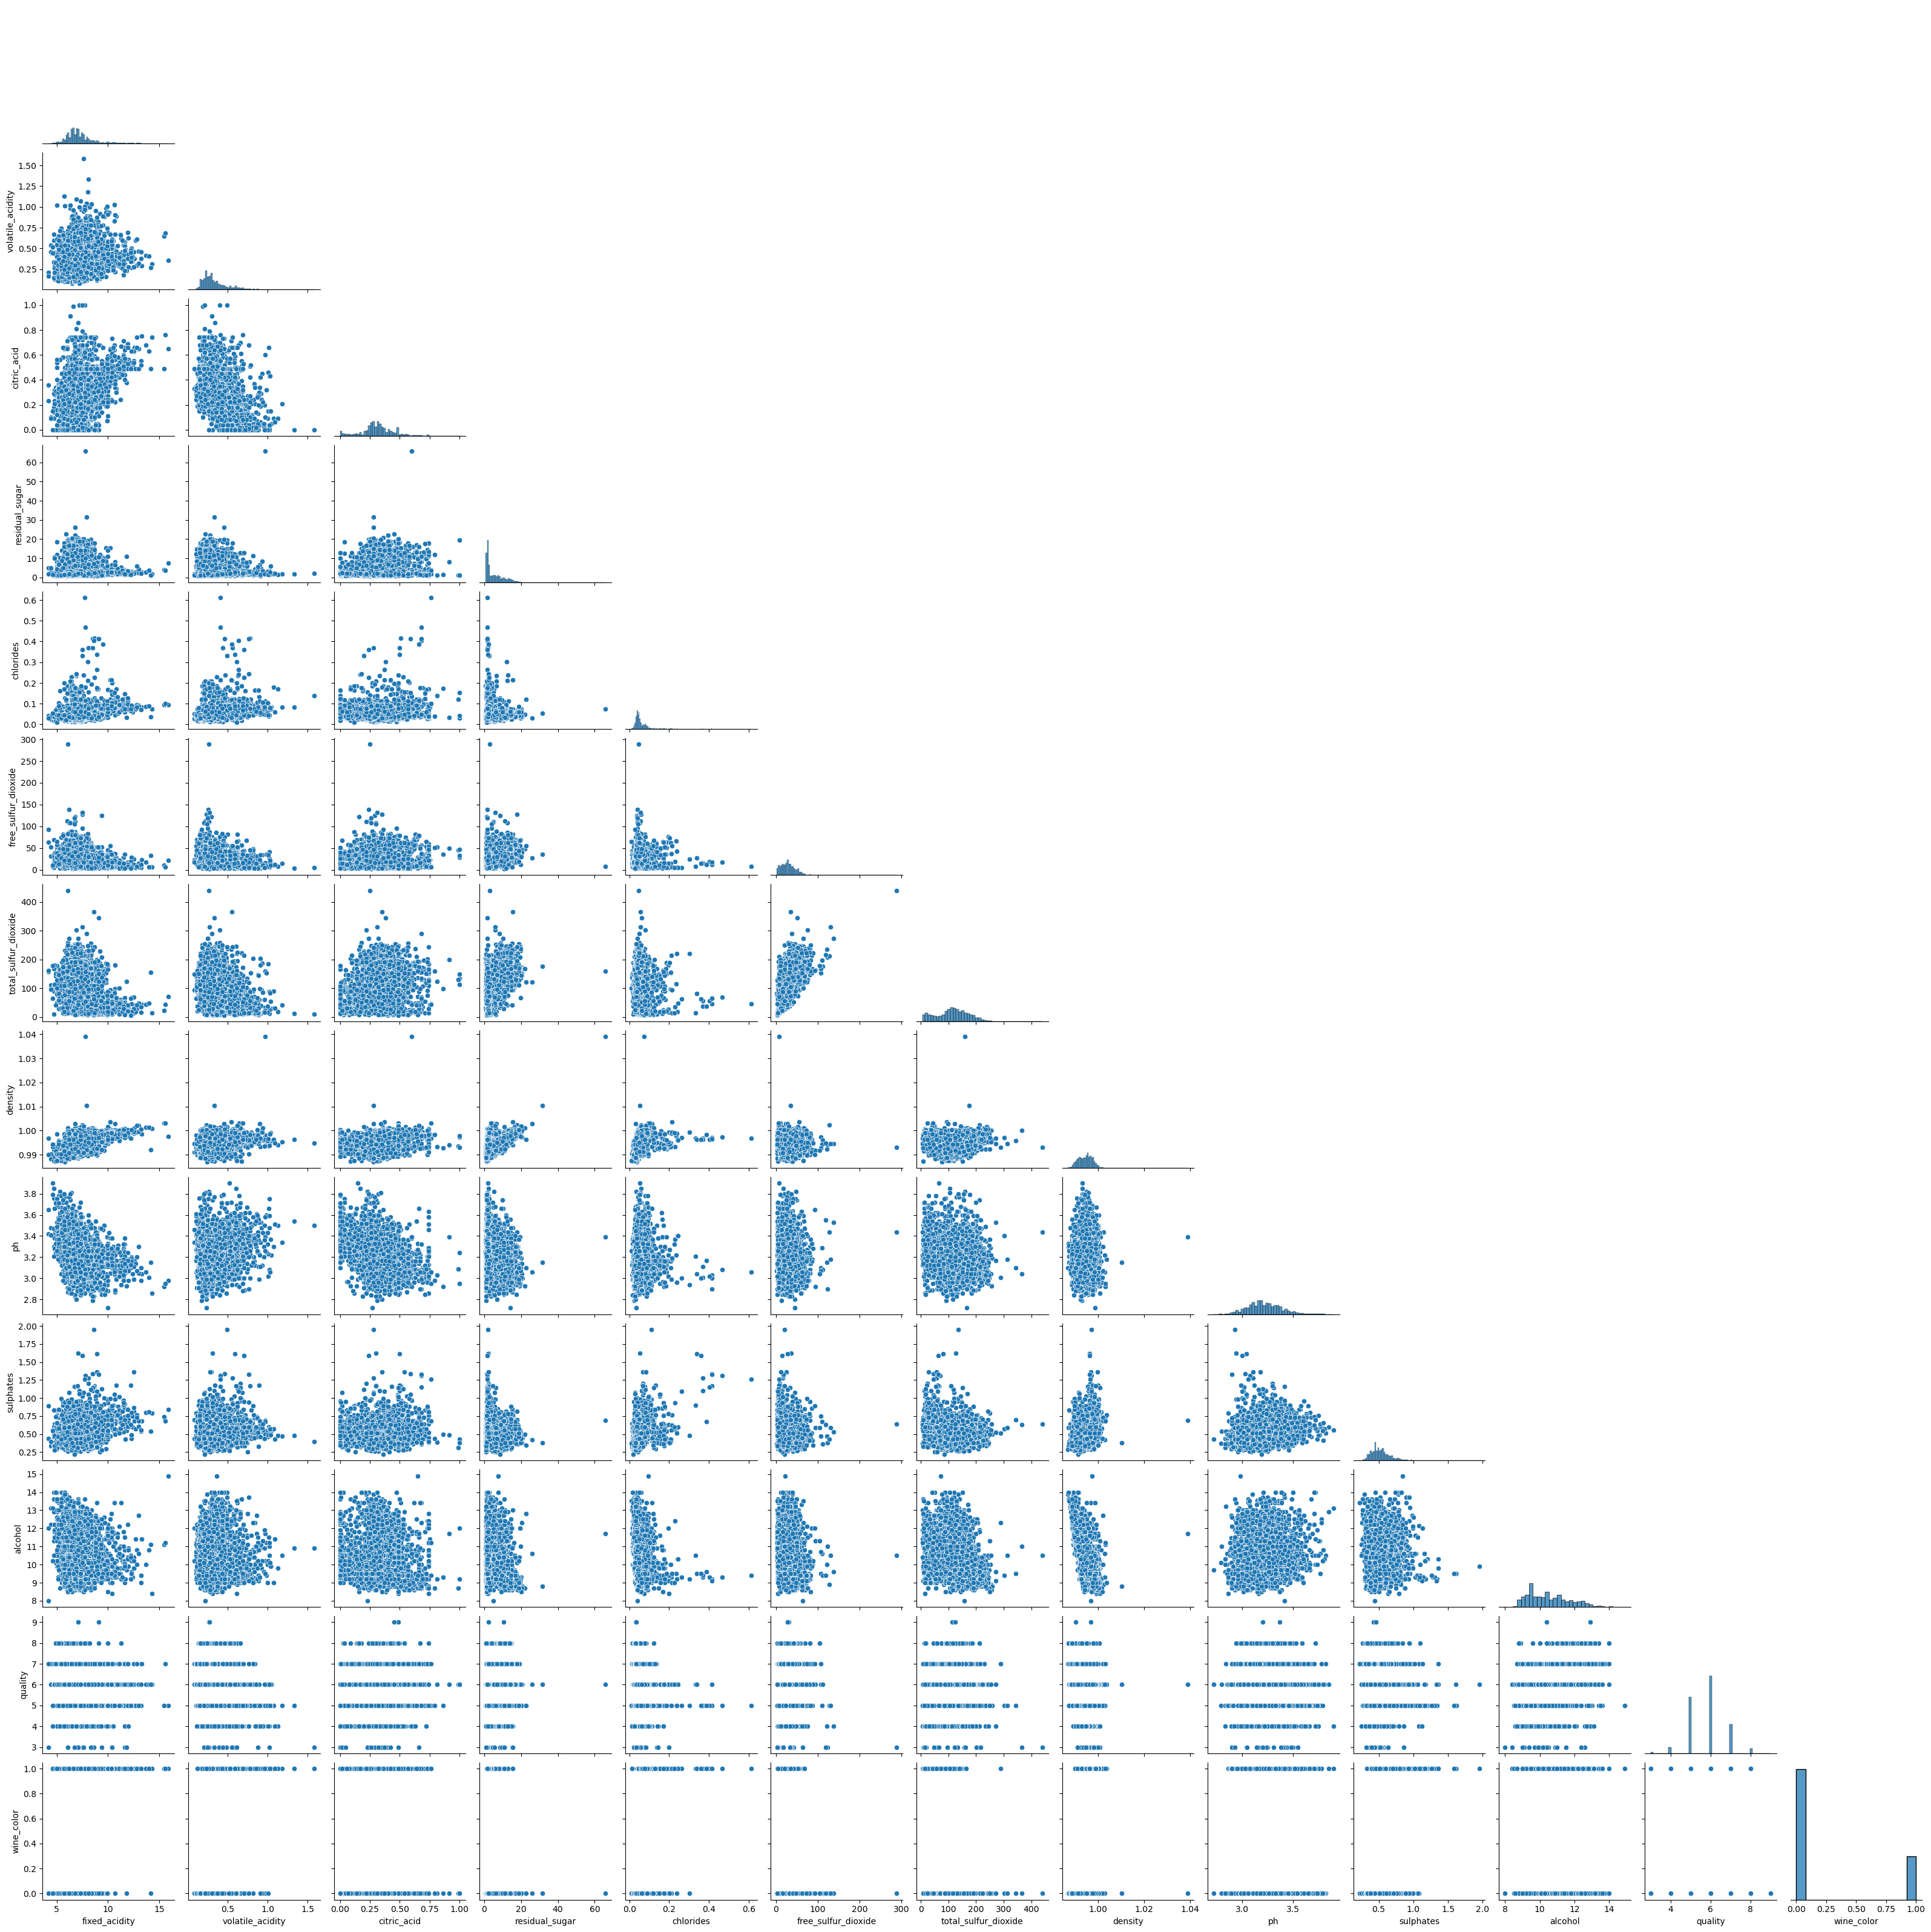

In [39]:
sns.pairplot(train, corner=True)
plt.show()

## BI-VARIATE MEANS

In [40]:
train[train.quality == 3].mean()

fixed_acidity             8.026316
volatile_acidity          0.481579
citric_acid               0.306842
residual_sugar            5.728947
chlorides                 0.066316
free_sulfur_dioxide      44.263158
total_sulfur_dioxide    125.815789
density                   0.996087
ph                        3.251053
sulphates                 0.517368
alcohol                  10.294737
quality                   3.000000
wine_color                0.315789
dtype: float64

In [41]:
df_mean_by_qual = train.groupby(by='quality').mean()

In [42]:
df_mean_by_qual['count'] = train.quality.value_counts().sort_index()

In [43]:
df_mean_by_qual

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,wine_color,count
quality,,,,,,,,,,,,,
3,8.026316,0.481579,0.306842,5.728947,0.066316,44.263158,125.815789,0.996087,3.251053,0.517368,10.294737,0.315789,19
4,7.233065,0.461169,0.272258,4.009274,0.057669,21.923387,105.729839,0.994857,3.250484,0.514516,10.217339,0.258065,124
5,7.339804,0.395145,0.307381,5.620307,0.065251,29.999573,119.844283,0.995798,3.210964,0.526596,9.847099,0.329352,1172
6,7.181595,0.314547,0.323048,5.494631,0.054258,31.075419,115.165115,0.994546,3.216549,0.532601,10.578471,0.221601,1611
7,7.104934,0.289523,0.332961,4.718586,0.045480,30.115954,106.876645,0.993136,3.232418,0.546053,11.380033,0.190789,608
8,6.737624,0.290990,0.326634,5.385644,0.040990,35.831683,122.123762,0.992393,3.222970,0.511881,11.687129,0.079208,101
9,8.100000,0.265000,0.470000,6.400000,0.033500,29.500000,118.500000,0.993650,3.285000,0.440000,11.650000,0.000000,2


In [44]:
round(len(red_df)/len(white_df),3)

0.326

In [45]:
df_mean_by_color = train.groupby(by='wine_color').mean()

In [46]:
df_mean_by_color['count'] = train.wine_color.value_counts().sort_index()

In [47]:
df_mean_by_color

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,count
wine_color,,,,,,,,,,,,,
0,6.857430,0.278221,0.334594,6.293540,0.045493,35.270315,138.083272,0.993985,3.188664,0.491102,10.528164,5.881040,2732
1,8.290829,0.532630,0.267989,2.515525,0.088249,15.924309,46.186188,0.996746,3.310398,0.653823,10.392357,5.628729,905


/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


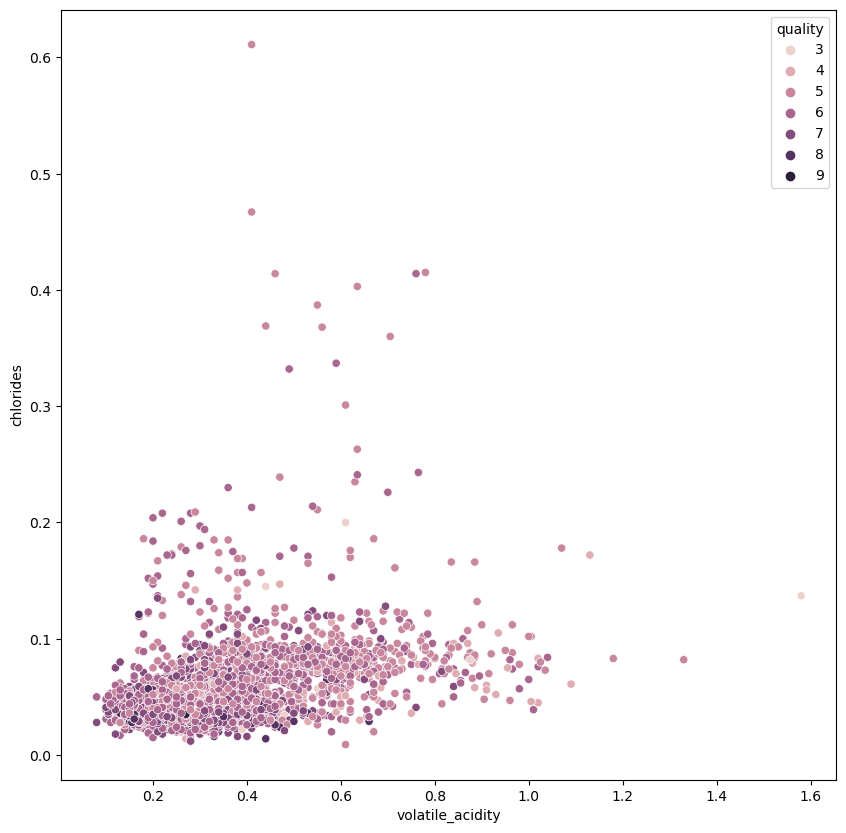

In [48]:
# No good-SCALE IT FIRST
plt.figure(figsize=(10,10))
sns.scatterplot(train.volatile_acidity, train.chlorides,hue=train.quality)
plt.title('')
plt.show()

In [49]:
df_mean_by_color_and_quality = train.groupby(by=['wine_color','quality']).mean()

In [50]:
df_mean_by_color_and_quality

fixed_acidity  volatile_acidity  citric_acid  \
wine_color quality                                                 
0          3             7.469231          0.311154     0.322308   
           4             7.088043          0.372174     0.315109   
           5             6.971056          0.304606     0.339911   
           6             6.843501          0.260881     0.337376   
           7             6.689837          0.262114     0.324187   
           8             6.631183          0.276989     0.325269   
           9             8.100000          0.265000     0.470000   
1          3             9.233333          0.850833     0.273333   
           4             7.650000          0.717031     0.149063   
           5             8.090674          0.579508     0.241140   
           6             8.369188          0.503053     0.272717   
           7             8.865517          0.405776     0.370172   
           8             7.975000          0.453750     0.342500   

                    residual_sugar  chlorides  free_sulfur_dioxide  \
wine_color quality                                                   
0          3              7.065385   0.041385            59.846154   
           4              4.462500   0.049609            25.342391   
           5              7.154135   0.050858            36.281807   
           6              6.360128   0.045294            35.384769   
           7              5.193598   0.038114            34.203252   
           8              5.642473   0.038645            37.333333   
           9              6.400000   0.033500            29.500000   
1          3              2.833333   0.120333            10.500000   
           4              2.706250   0.080844            12.093750   
           5              2.497021   0.094560            17.207254   
           6              2.454482   0.085742            15.938375   
           7              2.703879   0.076724            12.780172   
           8              2.400000   0.068250            18.375000   

                    total_sulfur_dioxide   density        ph  sulphates  \
wine_color quality                                                        
0          3                  172.730769  0.995029  3.200000   0.489231   
           4                  130.070652  0.994304  3.191957   0.489130   
           5                  150.871501  0.995193  3.164427   0.480852   
           6                  136.209729  0.993936  3.189649   0.493636   
           7                  124.774390  0.992426  3.218577   0.501850   
           8                  129.177419  0.992245  3.215054   0.490000   
           9                  118.500000  0.993650  3.285000   0.440000   
1          3                   24.166667  0.998380  3.361667   0.578333   
           4                   35.750000  0.996444  3.418750   0.587500   
           5                   56.664508  0.997031  3.305725   0.619741   
           6                   41.243697  0.996690  3.311036   0.669468   
           7                   30.965517  0.996151  3.291121   0.733534   
           8                   40.125000  0.994119  3.315000   0.766250   

                      alcohol  
wine_color quality             
0          3        10.476923  
           4        10.126630  
           5         9.816921  
           6        10.589740  
           7        11.376545  
           8        11.601075  
           9        11.650000  
1          3         9.900000  
           4        10.478125  
           5         9.908549  
           6        10.538889  
           7        11.394828  
           8        12.687500

In [51]:
train.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'ph', 'sulphates', 'alcohol', 'quality', 'wine_color'],
      dtype='object')

In [52]:
train_targets = train.drop(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'ph', 'sulphates', 'alcohol'],axis=1)

In [53]:
validate_targets = validate.drop(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'ph', 'sulphates', 'alcohol'],axis=1)
test_targets = test.drop(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'ph', 'sulphates', 'alcohol'],axis=1)

In [54]:
train_targets.reset_index(drop=True,inplace=True)

In [55]:
validate_targets.reset_index(drop=True,inplace=True)
test_targets.reset_index(drop=True,inplace=True)

In [56]:
train_targets

,quality,wine_color
0,7,0
1,6,0
2,6,0
3,5,0
4,6,0
...,...,...
3632,6,0
3633,6,0
3634,5,0
3635,6,1


## CREATE X_train, etc...

In [57]:
    # split train into X (dataframe, drop target) & y (series, keep target only)
    X_train_all = train.drop(columns=['quality'])
    y_train = train['quality']
    
    # split validate into X (dataframe, drop target) & y (series, keep target only)
    X_validate_all = validate.drop(columns=['quality'])
    y_validate = validate['quality']
    
    # split test into X (dataframe, drop target) & y (series, keep target only)
    X_test_all = test.drop(columns=['quality'])
    y_test = test['quality']

## MINMAX SCALER

In [58]:
#SCALING First MinMax...then ROBUST
columns = train.columns[:-2]
mm_scaler = sklearn.preprocessing.MinMaxScaler()
train_mm_scaled = X_train_scaled = mm_scaler.fit_transform(train[columns])
X_validate_scaled = mm_scaler.transform(validate[columns])
X_test_scaled = mm_scaler.transform(test[columns])

In [59]:
train_scaled = pd.DataFrame(data=train_mm_scaled,columns=columns)
validate_scaled = pd.DataFrame(data=X_validate_scaled,columns=columns)
test_scaled = pd.DataFrame(data=X_test_scaled,columns=columns)

In [60]:
test_scaled

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol
0,0.273504,0.080000,1.66,0.021505,0.021595,0.111498,0.246544,0.087527,0.457627,0.190751,0.608696
1,0.307692,0.106667,0.18,0.092166,0.061462,0.108014,0.354839,0.177174,0.406780,0.196532,0.260870
2,0.162393,0.133333,0.22,0.016897,0.041528,0.104530,0.253456,0.051860,0.542373,0.127168,0.666667
3,0.256410,0.023333,0.30,0.093702,0.078073,0.083624,0.228111,0.159823,0.610169,0.104046,0.231884
4,0.162393,0.160000,0.25,0.016897,0.127907,0.010453,0.059908,0.145171,0.542373,0.127168,0.304348
...,...,...,...,...,...,...,...,...,...,...,...
1945,0.213675,0.126667,0.25,0.112135,0.073090,0.181185,0.451613,0.173318,0.423729,0.121387,0.188406
1946,0.282051,0.106667,0.49,0.133641,0.064784,0.167247,0.329493,0.175246,0.381356,0.213873,0.362319
1947,0.128205,0.093333,0.25,0.006144,0.068106,0.331010,0.389401,0.074802,0.610169,0.231214,0.449275
1948,0.205128,0.106667,0.22,0.178187,0.069767,0.114983,0.322581,0.186042,0.322034,0.260116,0.202899


In [61]:
train_scaled = pd.concat([train_scaled,train_targets],axis=1)
validate_scaled = pd.concat([validate_scaled,train_targets],axis=1)
test_scaled = pd.concat([test_scaled,train_targets],axis=1)

In [62]:
train_scaled

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,wine_color
0,0.376068,0.123333,0.36,0.007680,0.041528,0.045296,0.170507,0.080779,0.194915,0.080925,0.492754,7,0
1,0.324786,0.080000,0.30,0.113671,0.046512,0.139373,0.285714,0.128783,0.322034,0.260116,0.550725,6,0
2,0.256410,0.080000,0.61,0.238095,0.056478,0.041812,0.223502,0.223443,0.288136,0.080925,0.173913,6,0
3,0.205128,0.126667,0.33,0.010753,0.054817,0.076655,0.407834,0.097166,0.483051,0.138728,0.391304,5,0
4,0.213675,0.160000,0.32,0.015361,0.036545,0.101045,0.248848,0.045306,0.338983,0.075145,0.652174,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3632,0.170940,0.120000,0.29,0.019969,0.044850,0.048780,0.186636,0.071332,0.516949,0.225434,0.550725,6,0
3633,0.247863,0.113333,0.31,0.024578,0.068106,0.104530,0.345622,0.082707,0.355932,0.167630,0.492754,6,0
3634,0.222222,0.146667,0.22,0.084485,0.084718,0.135889,0.423963,0.221130,0.389831,0.167630,0.173913,5,0
3635,0.170940,0.233333,0.22,0.016897,0.114618,0.066202,0.115207,0.177752,0.677966,0.219653,0.217391,6,1


In [63]:
train_scaled['qual_col'] = train_scaled['quality'].astype(str) + train_scaled['wine_color'].astype(str)

In [64]:
train_scaled.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,wine_color,qual_col
0,0.376068,0.123333,0.36,0.007680,0.041528,0.045296,0.170507,0.080779,0.194915,0.080925,0.492754,7,0,70
1,0.324786,0.080000,0.30,0.113671,0.046512,0.139373,0.285714,0.128783,0.322034,0.260116,0.550725,6,0,60
2,0.256410,0.080000,0.61,0.238095,0.056478,0.041812,0.223502,0.223443,0.288136,0.080925,0.173913,6,0,60
3,0.205128,0.126667,0.33,0.010753,0.054817,0.076655,0.407834,0.097166,0.483051,0.138728,0.391304,5,0,50
4,0.213675,0.160000,0.32,0.015361,0.036545,0.101045,0.248848,0.045306,0.338983,0.075145,0.652174,6,0,60


In [65]:
train_scaled

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,wine_color,qual_col
0,0.376068,0.123333,0.36,0.007680,0.041528,0.045296,0.170507,0.080779,0.194915,0.080925,0.492754,7,0,70
1,0.324786,0.080000,0.30,0.113671,0.046512,0.139373,0.285714,0.128783,0.322034,0.260116,0.550725,6,0,60
2,0.256410,0.080000,0.61,0.238095,0.056478,0.041812,0.223502,0.223443,0.288136,0.080925,0.173913,6,0,60
3,0.205128,0.126667,0.33,0.010753,0.054817,0.076655,0.407834,0.097166,0.483051,0.138728,0.391304,5,0,50
4,0.213675,0.160000,0.32,0.015361,0.036545,0.101045,0.248848,0.045306,0.338983,0.075145,0.652174,6,0,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3632,0.170940,0.120000,0.29,0.019969,0.044850,0.048780,0.186636,0.071332,0.516949,0.225434,0.550725,6,0,60
3633,0.247863,0.113333,0.31,0.024578,0.068106,0.104530,0.345622,0.082707,0.355932,0.167630,0.492754,6,0,60
3634,0.222222,0.146667,0.22,0.084485,0.084718,0.135889,0.423963,0.221130,0.389831,0.167630,0.173913,5,0,50
3635,0.170940,0.233333,0.22,0.016897,0.114618,0.066202,0.115207,0.177752,0.677966,0.219653,0.217391,6,1,61


## SCATTERPLOTS for CLUSTERING possibilities

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


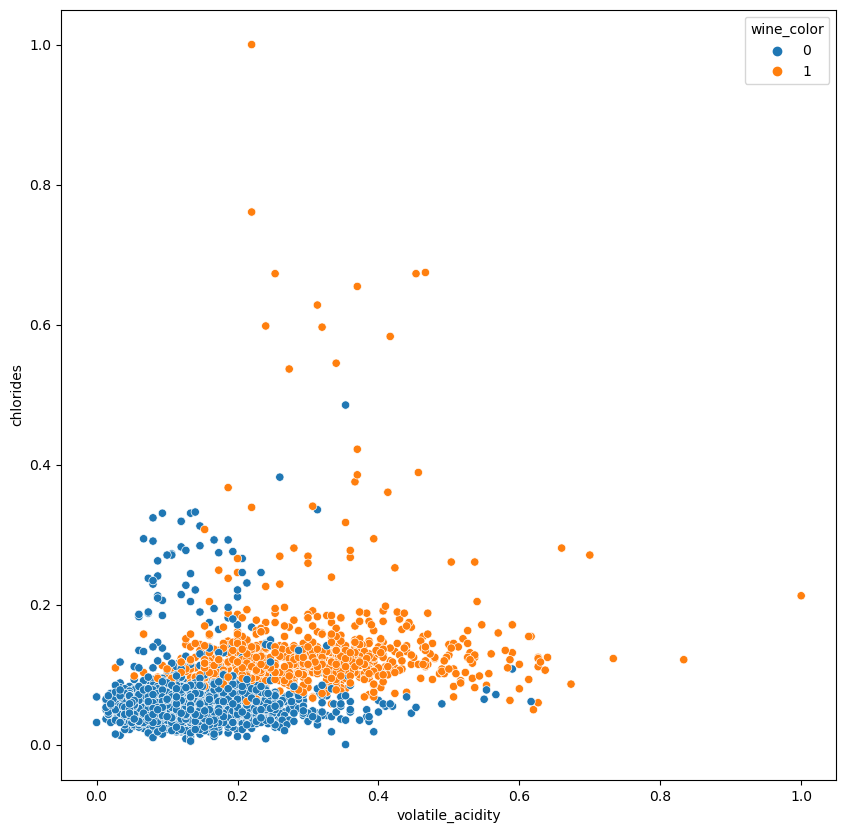

In [66]:
plt.figure(figsize=(10,10))
sns.scatterplot(train_scaled.volatile_acidity, train_scaled.chlorides,hue=train_scaled.wine_color)
plt.title('')
plt.show()

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


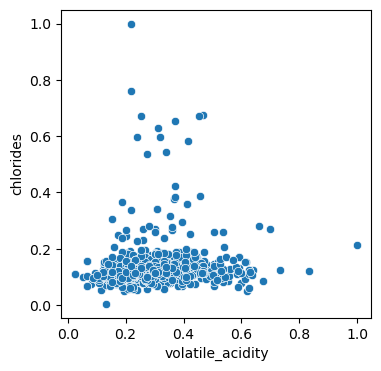

In [67]:
plt.figure(figsize=(4,4))
sns.scatterplot(train_scaled[train_scaled.wine_color==1].volatile_acidity,
                             train_scaled[train_scaled.wine_color==1].chlorides)
plt.title('')
plt.show()

In [68]:
train_scaled[train_scaled.wine_color==1]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,wine_color,qual_col
5,0.282051,0.286667,0.02,0.015361,0.124585,0.038328,0.057604,0.159437,0.542373,0.184971,0.362319,6,1,61
12,0.401709,0.446667,0.14,0.027650,0.127907,0.024390,0.055300,0.214575,0.525424,0.242775,0.362319,5,1,51
15,0.290598,0.233333,0.29,0.021505,0.109635,0.059233,0.138249,0.194139,0.576271,0.242775,0.217391,5,1,51
16,0.700855,0.180000,0.49,0.029186,0.116279,0.087108,0.145161,0.236939,0.338983,0.306358,0.347826,6,1,61
19,0.119658,0.153333,0.37,0.010753,0.107973,0.034843,0.207373,0.159823,0.508475,0.208092,0.173913,5,1,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3601,0.205128,0.516667,0.02,0.026114,0.088040,0.045296,0.039171,0.176595,0.694915,0.219653,0.434783,6,1,61
3619,0.384615,0.413333,0.24,0.027650,0.360465,0.010453,0.020737,0.231155,0.508475,0.219653,0.144928,6,1,61
3627,0.333333,0.300000,0.22,0.023041,0.114618,0.108014,0.191244,0.186428,0.457627,0.138728,0.231884,6,1,61
3631,0.264957,0.406667,0.32,0.023041,0.099668,0.114983,0.225806,0.177559,0.516949,0.167630,0.217391,5,1,51


In [69]:
train_scaled.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,wine_color
fixed_acidity,1.000000,0.228997,0.315221,-0.104639,0.305139,-0.274403,-0.312967,0.462502,-0.260236,0.289922,-0.112738,-0.086876,0.478678
volatile_acidity,0.228997,1.000000,-0.380403,-0.188455,0.402962,-0.357760,-0.421221,0.290305,0.262469,0.216770,-0.047849,-0.270388,0.658595
citric_acid,0.315221,-0.380403,1.000000,0.151491,0.025029,0.138341,0.205758,0.092182,-0.340003,0.054903,-0.017311,0.079641,-0.200358
residual_sugar,-0.104639,-0.188455,0.151491,1.000000,-0.140423,0.385733,0.482033,0.548438,-0.261456,-0.183930,-0.323467,-0.025020,-0.345480
chlorides,0.305139,0.402962,0.025029,-0.140423,1.000000,-0.211426,-0.302088,0.367201,0.059435,0.390544,-0.259919,-0.196069,0.537514
free_sulfur_dioxide,-0.274403,-0.357760,0.138341,0.385733,-0.211426,1.000000,0.710964,0.010829,-0.144161,-0.174600,-0.165820,0.048031,-0.463975
total_sulfur_dioxide,-0.312967,-0.421221,0.205758,0.482033,-0.302088,0.710964,1.000000,0.024015,-0.239549,-0.262579,-0.251249,-0.040837,-0.699789
density,0.462502,0.290305,0.092182,0.548438,0.367201,0.010829,0.024015,1.000000,0.015693,0.254013,-0.670839,-0.298349,0.395489
ph,-0.260236,0.262469,-0.340003,-0.261456,0.059435,-0.144161,-0.239549,0.015693,1.000000,0.181222,0.123157,0.017946,0.327831
sulphates,0.289922,0.216770,0.054903,-0.183930,0.390544,-0.174600,-0.262579,0.254013,0.181222,1.000000,-0.016055,0.032343,0.474490


In [70]:
train_scaled[train_scaled.qual_col==60]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,wine_color,qual_col


/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


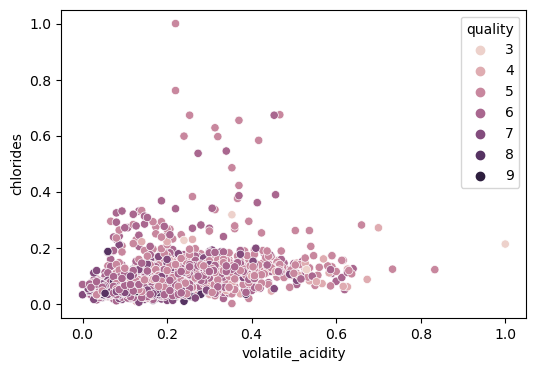

In [104]:
plt.figure(figsize=(6,4))
sns.scatterplot(train_scaled.volatile_acidity, train_scaled.chlorides,hue=train_scaled.quality)
plt.title('')
plt.show()

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


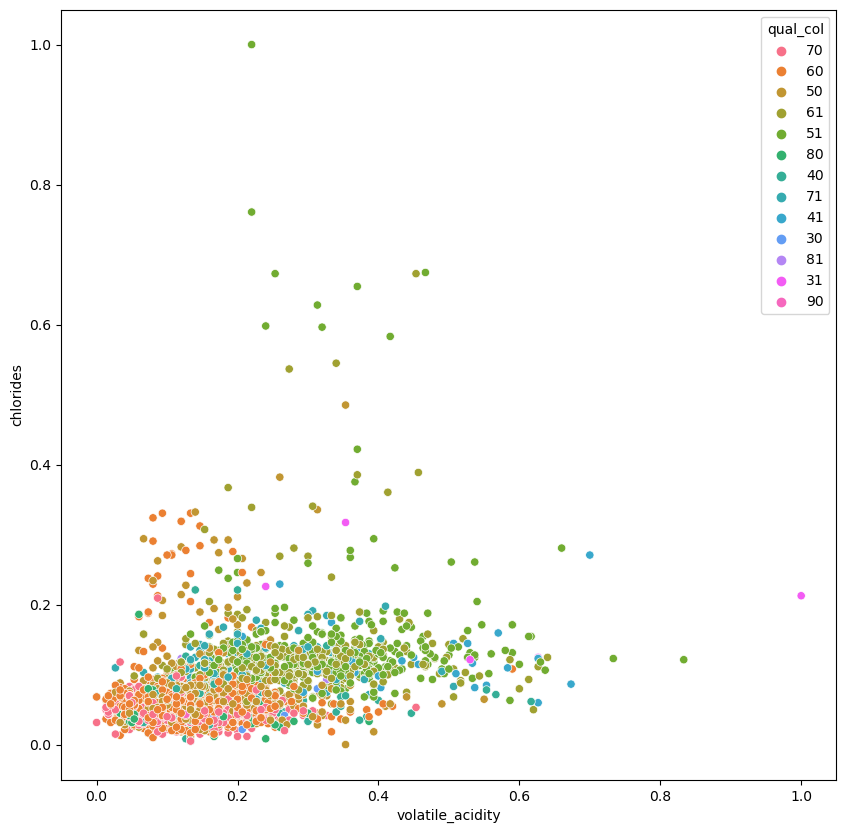

In [72]:
plt.figure(figsize=(10,10))
sns.scatterplot(train_scaled.volatile_acidity, train_scaled.chlorides,hue=train_scaled.qual_col)
plt.title('')
plt.show()

In [73]:
df_mean_by_color

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,count
wine_color,,,,,,,,,,,,,
0,6.857430,0.278221,0.334594,6.293540,0.045493,35.270315,138.083272,0.993985,3.188664,0.491102,10.528164,5.881040,2732
1,8.290829,0.532630,0.267989,2.515525,0.088249,15.924309,46.186188,0.996746,3.310398,0.653823,10.392357,5.628729,905


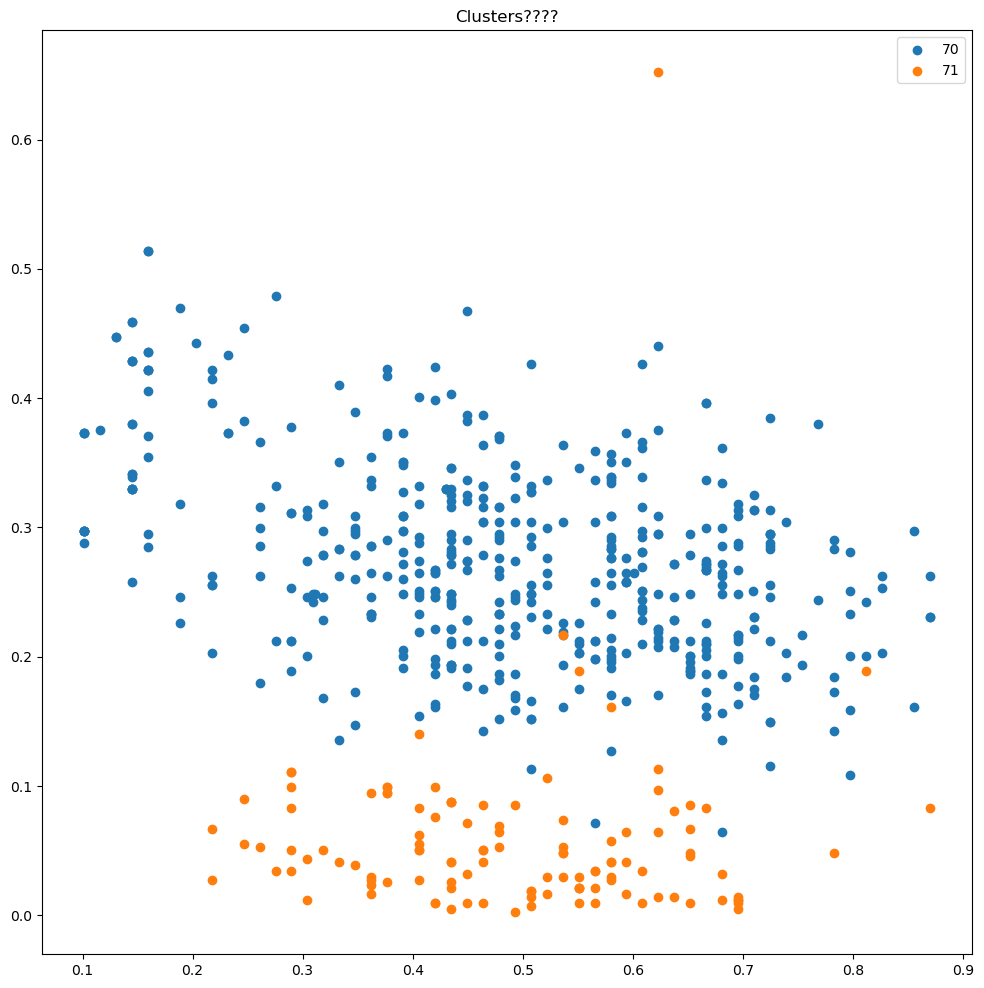

In [74]:
clust_list = ['70','71']

plt.figure(figsize=(12,12))
for cluster in clust_list:
    plt.scatter(train_scaled[train_scaled.qual_col == cluster].alcohol,
             train_scaled[train_scaled.qual_col == cluster].total_sulfur_dioxide,
               label=cluster)
plt.title('Clusters????')
plt.legend()
plt.show()

In [75]:
train_scaled.chlorides.describe()

count    3637.000000
mean        0.078293
std         0.057133
min         0.000000
25%         0.048173
50%         0.063123
75%         0.093023
max         1.000000
Name: chlorides, dtype: float64

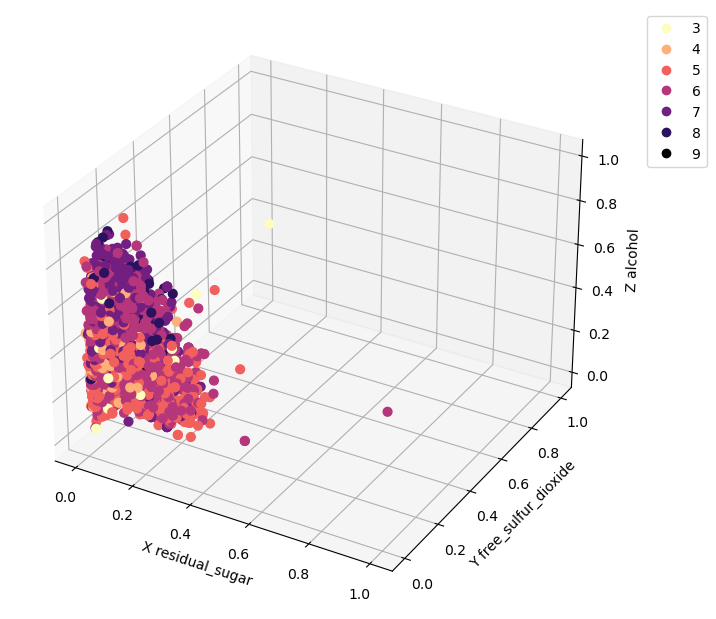

In [76]:
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
cmap = ListedColormap(sns.color_palette("magma_r",256).as_hex())
sc = ax.scatter(train_scaled.residual_sugar, train_scaled.free_sulfur_dioxide, train_scaled.alcohol,
                s=40, c=train_scaled.quality, marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('X residual_sugar')
ax.set_ylabel('Y free_sulfur_dioxide')
ax.set_zlabel('Z alcohol')
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

## ROBUST SCALER - does not add much value

In [77]:
#SCALING ...now ROBUST
columns = train.columns[:-2]
rbst_scaler = sklearn.preprocessing.RobustScaler()
train_rbst_scaled = rbst_scaler.fit_transform(train[columns])

In [78]:
train_rbst_scaled = pd.DataFrame(data=train_rbst_scaled,columns=columns)

In [79]:
train_rbst_scaled

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol
0,1.230769,-0.194444,0.357143,-0.274194,-0.481481,-0.583333,-0.487179,-0.773626,-1.238095,-0.882353,0.611111
1,0.769231,-0.555556,-0.071429,0.838710,-0.370370,0.541667,0.153846,-0.226374,-0.523810,0.941176,0.833333
2,0.153846,-0.555556,2.142857,2.145161,-0.148148,-0.625000,-0.192308,0.852747,-0.714286,-0.882353,-0.611111
3,-0.307692,-0.166667,0.142857,-0.241935,-0.185185,-0.208333,0.833333,-0.586813,0.380952,-0.294118,0.222222
4,-0.230769,0.111111,0.071429,-0.193548,-0.592593,0.083333,-0.051282,-1.178022,-0.428571,-0.941176,1.222222
...,...,...,...,...,...,...,...,...,...,...,...
3632,-0.615385,-0.222222,-0.142857,-0.145161,-0.407407,-0.541667,-0.397436,-0.881319,0.571429,0.588235,0.833333
3633,0.076923,-0.277778,0.000000,-0.096774,0.111111,0.125000,0.487179,-0.751648,-0.333333,0.000000,0.611111
3634,-0.153846,0.000000,-0.642857,0.532258,0.481481,0.500000,0.923077,0.826374,-0.142857,0.000000,-0.611111
3635,-0.615385,0.722222,-0.642857,-0.177419,1.148148,-0.333333,-0.794872,0.331868,1.476190,0.529412,-0.444444


In [80]:
train_rbst_scaled = pd.concat([train_rbst_scaled,train_targets],axis=1)

In [81]:
train_rbst_scaled

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,wine_color
0,1.230769,-0.194444,0.357143,-0.274194,-0.481481,-0.583333,-0.487179,-0.773626,-1.238095,-0.882353,0.611111,7,0
1,0.769231,-0.555556,-0.071429,0.838710,-0.370370,0.541667,0.153846,-0.226374,-0.523810,0.941176,0.833333,6,0
2,0.153846,-0.555556,2.142857,2.145161,-0.148148,-0.625000,-0.192308,0.852747,-0.714286,-0.882353,-0.611111,6,0
3,-0.307692,-0.166667,0.142857,-0.241935,-0.185185,-0.208333,0.833333,-0.586813,0.380952,-0.294118,0.222222,5,0
4,-0.230769,0.111111,0.071429,-0.193548,-0.592593,0.083333,-0.051282,-1.178022,-0.428571,-0.941176,1.222222,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3632,-0.615385,-0.222222,-0.142857,-0.145161,-0.407407,-0.541667,-0.397436,-0.881319,0.571429,0.588235,0.833333,6,0
3633,0.076923,-0.277778,0.000000,-0.096774,0.111111,0.125000,0.487179,-0.751648,-0.333333,0.000000,0.611111,6,0
3634,-0.153846,0.000000,-0.642857,0.532258,0.481481,0.500000,0.923077,0.826374,-0.142857,0.000000,-0.611111,5,0
3635,-0.615385,0.722222,-0.642857,-0.177419,1.148148,-0.333333,-0.794872,0.331868,1.476190,0.529412,-0.444444,6,1


In [82]:
train_rbst_scaled['qual_col'] = train_rbst_scaled['quality'].astype(str) + train_rbst_scaled['wine_color'].astype(str)

In [83]:
train_rbst_scaled.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,wine_color,qual_col
0,1.230769,-0.194444,0.357143,-0.274194,-0.481481,-0.583333,-0.487179,-0.773626,-1.238095,-0.882353,0.611111,7,0,70
1,0.769231,-0.555556,-0.071429,0.838710,-0.370370,0.541667,0.153846,-0.226374,-0.523810,0.941176,0.833333,6,0,60
2,0.153846,-0.555556,2.142857,2.145161,-0.148148,-0.625000,-0.192308,0.852747,-0.714286,-0.882353,-0.611111,6,0,60
3,-0.307692,-0.166667,0.142857,-0.241935,-0.185185,-0.208333,0.833333,-0.586813,0.380952,-0.294118,0.222222,5,0,50
4,-0.230769,0.111111,0.071429,-0.193548,-0.592593,0.083333,-0.051282,-1.178022,-0.428571,-0.941176,1.222222,6,0,60


/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


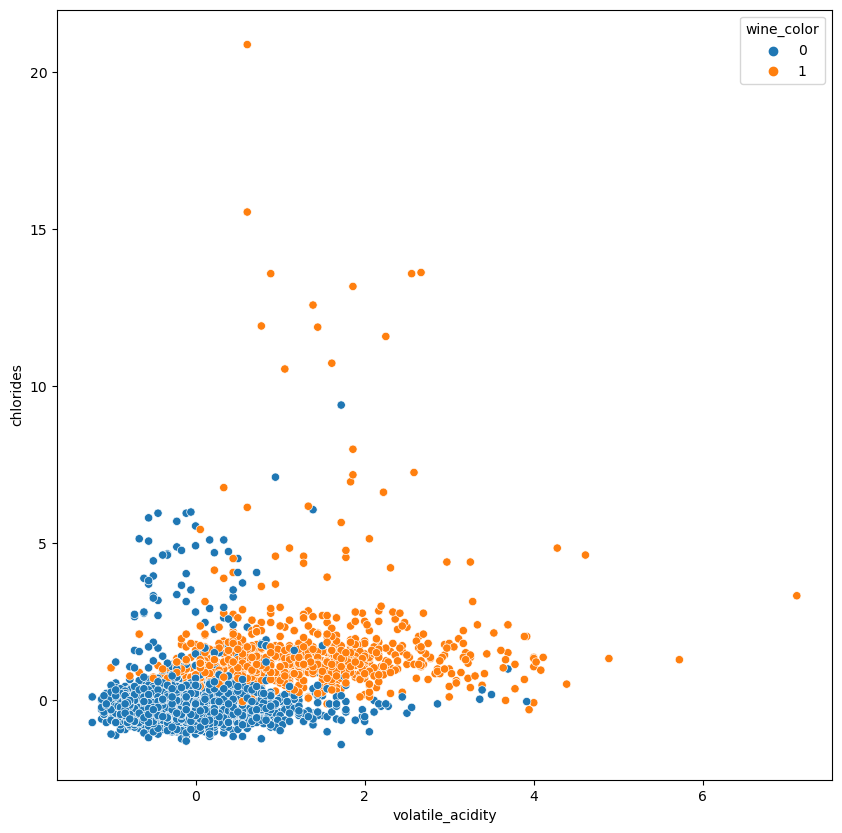

In [84]:
plt.figure(figsize=(10,10))
sns.scatterplot(train_rbst_scaled.volatile_acidity, train_rbst_scaled.chlorides,hue=train_rbst_scaled.wine_color)
plt.title('')
plt.show()

In [85]:
train_rbst_scaled.chlorides.describe()

count    3637.000000
mean        0.338232
std         1.273844
min        -1.407407
25%        -0.333333
50%         0.000000
75%         0.666667
max        20.888889
Name: chlorides, dtype: float64

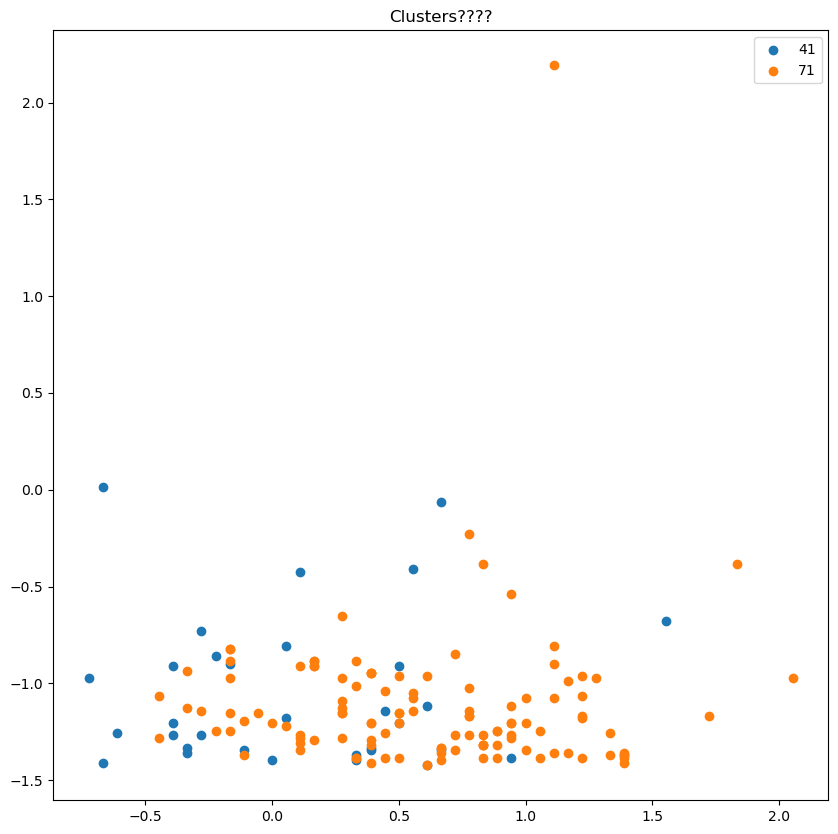

In [86]:
clust_list = ['41','71']

plt.figure(figsize=(10,10))
for cluster in clust_list:
    plt.scatter(train_rbst_scaled[train_rbst_scaled.qual_col == cluster].alcohol,
             train_rbst_scaled[train_rbst_scaled.qual_col == cluster].total_sulfur_dioxide,
               label=cluster)
plt.title('Clusters????')
plt.legend()
plt.show()

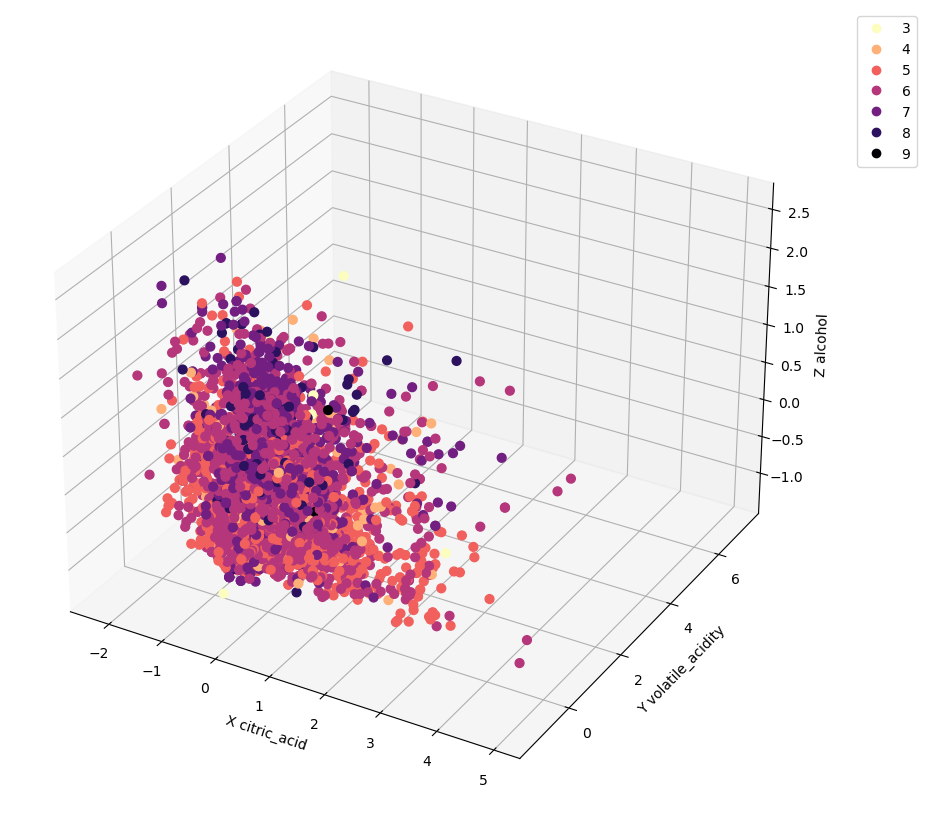

In [87]:
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
cmap = ListedColormap(sns.color_palette("magma_r",256).as_hex())
sc = ax.scatter(train_rbst_scaled.citric_acid, train_rbst_scaled.volatile_acidity, train_rbst_scaled.alcohol,
                s=40, c=train_rbst_scaled.quality, marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('X citric_acid')
ax.set_ylabel('Y volatile_acidity')
ax.set_zlabel('Z alcohol')
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

## HYPO TESTING

In [88]:
train.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,wine_color
fixed_acidity,1.000000,0.228997,0.315221,-0.104639,0.305139,-0.274403,-0.312967,0.462502,-0.260236,0.289922,-0.112738,-0.086876,0.478678
volatile_acidity,0.228997,1.000000,-0.380403,-0.188455,0.402962,-0.357760,-0.421221,0.290305,0.262469,0.216770,-0.047849,-0.270388,0.658595
citric_acid,0.315221,-0.380403,1.000000,0.151491,0.025029,0.138341,0.205758,0.092182,-0.340003,0.054903,-0.017311,0.079641,-0.200358
residual_sugar,-0.104639,-0.188455,0.151491,1.000000,-0.140423,0.385733,0.482033,0.548438,-0.261456,-0.183930,-0.323467,-0.025020,-0.345480
chlorides,0.305139,0.402962,0.025029,-0.140423,1.000000,-0.211426,-0.302088,0.367201,0.059435,0.390544,-0.259919,-0.196069,0.537514
free_sulfur_dioxide,-0.274403,-0.357760,0.138341,0.385733,-0.211426,1.000000,0.710964,0.010829,-0.144161,-0.174600,-0.165820,0.048031,-0.463975
total_sulfur_dioxide,-0.312967,-0.421221,0.205758,0.482033,-0.302088,0.710964,1.000000,0.024015,-0.239549,-0.262579,-0.251249,-0.040837,-0.699789
density,0.462502,0.290305,0.092182,0.548438,0.367201,0.010829,0.024015,1.000000,0.015693,0.254013,-0.670839,-0.298349,0.395489
ph,-0.260236,0.262469,-0.340003,-0.261456,0.059435,-0.144161,-0.239549,0.015693,1.000000,0.181222,0.123157,0.017946,0.327831
sulphates,0.289922,0.216770,0.054903,-0.183930,0.390544,-0.174600,-0.262579,0.254013,0.181222,1.000000,-0.016055,0.032343,0.474490


<AxesSubplot:>

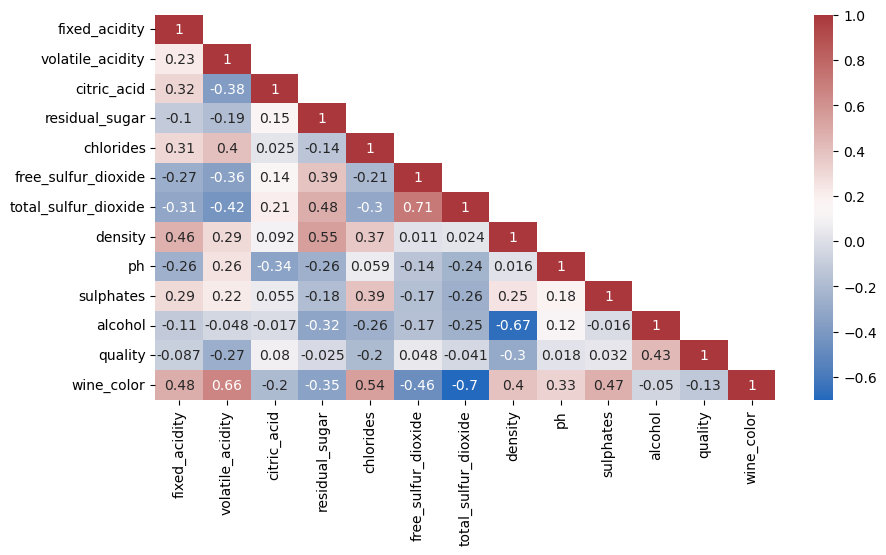

In [89]:
# np.triu(train.corr())
fig = plt.figure(figsize=(10,5))
sns.heatmap(train.corr(),
           cmap='vlag',
           annot=True,
           mask=np.triu(train.corr(),1))

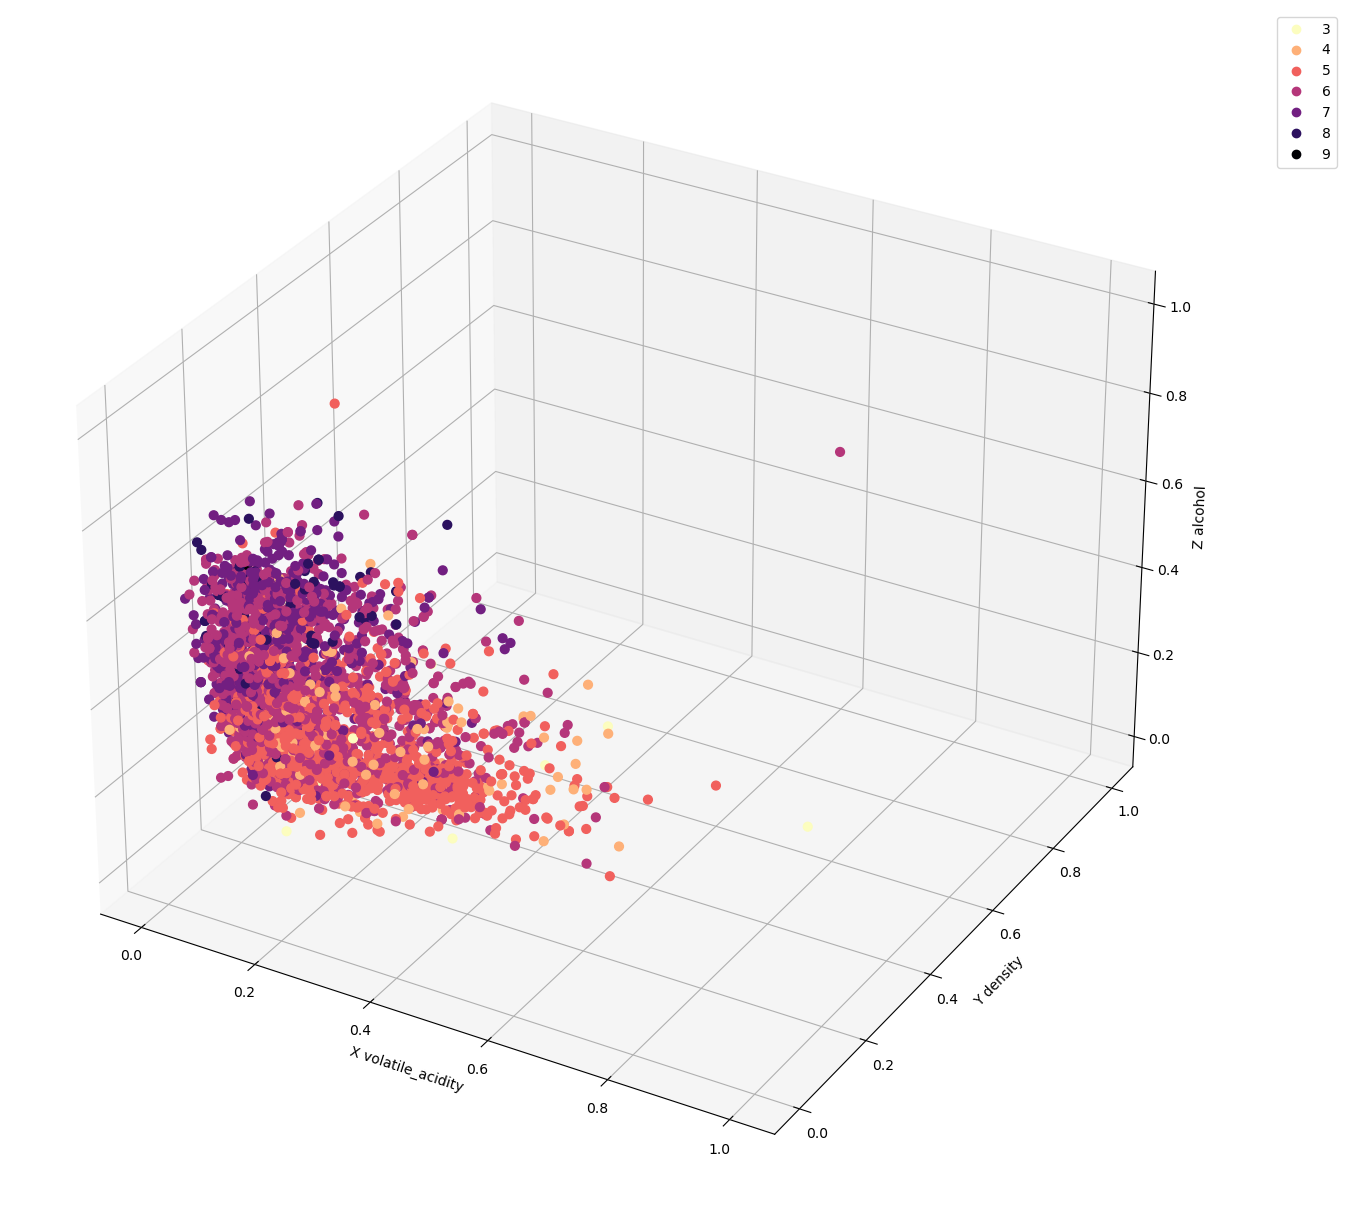

In [90]:
fig = plt.figure(figsize=(12,12))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
cmap = ListedColormap(sns.color_palette("magma_r",256).as_hex())
sc = ax.scatter(train_scaled.volatile_acidity, train_scaled.density, train_scaled.alcohol,
                s=40, c=train_scaled.quality, marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('X volatile_acidity')
ax.set_ylabel('Y density')
ax.set_zlabel('Z alcohol')
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

# ALCOHOL and QUALITY correlation?
## Does a statistically significant correlation exist between mean ALCOHOL and QUALITY within the OVERALL sample?
### Pearson's R

### Hypothesis

- ${H_0}$: No statistically significant correlation exists between mean ALCOHOL and QUALITY.
- ${H_a}$: A statistically significant correlation exists between mean ALCOHOL and QUALITY.

#### Pearson's R

α = 0.05

# q6_alcohol_values = train[train.quality == 6].alcohol
# overall_mean = train.quality.mean()

r, p = stats.spearmanr(train.alcohol,train.quality)
print(r,p,α)
print(f'p = {p:e}')

# with a p-value of close to Zero, Reject the NULL
### A statistically significant correlation exists, there is evidence to suggest that the two samples exhibit a linear relationship.

# DENSITY and QUALITY correlation?
## Does a statistically significant correlation exist between mean DENSITY and QUALITY within the OVERALL sample?
### Pearson's R

### Hypothesis

- ${H_0}$: No statistically significant correlation exists between mean DENSITY and QUALITY.
- ${H_a}$: A statistically significant correlation exists between mean DENSITY and QUALITY.

#### Pearson's R

α = 0.05

# q6_alcohol_values = train[train.quality == 6].alcohol
# overall_mean = train.quality.mean()

r, p = stats.spearmanr(train.density,train.quality)
print(r,p,α)
print(f'p = {p:e}')

# with a p-value of close to Zero, Reject the NULL
### A statistically significant correlation exists, there is evidence to suggest that the two samples exhibit a linear relationship.

# TOTAL_SO2 and COLOR correlation?
## Does a statistically significant correlation exist between mean TOTAL_SO2 and COLOR within the OVERALL sample?
### Pearson's R

### Hypothesis

- ${H_0}$: No statistically significant correlation exists between mean TOTAL_SO2 and COLOR.
- ${H_a}$: A statistically significant correlation exists between mean TOTAL_SO2 and COLOR
#### Pearson's R

In [93]:
α = 0.05
# q6_alcohol_values = train[train.quality == 6].alcohol
# overall_mean = train.quality.mean()
r, p = stats.spearmanr(train.total_sulfur_dioxide,train.wine_color)
print(r,p,α)
print(f'p = {p:e}')

-0.6796249206308841 0.0 0.05
p = 0.000000e+00


# with a p-value of close to Zero, Reject the NULL
### A statistically significant correlation exists, there is evidence to suggest that the two samples exhibit a linear relationship.

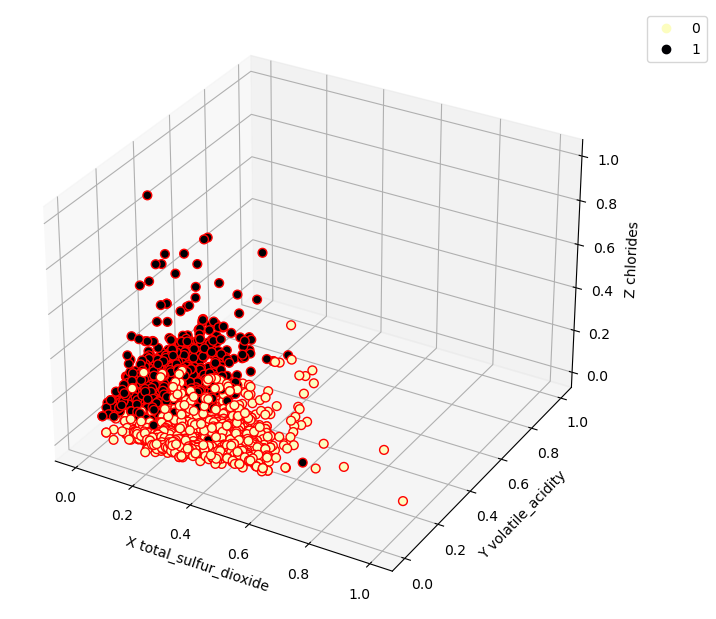

In [105]:
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
cmap = ListedColormap(sns.color_palette("magma_r",256).as_hex())
sc = ax.scatter(train_scaled.total_sulfur_dioxide, train_scaled.volatile_acidity, train_scaled.chlorides,
                s=40, c=train_scaled.wine_color, marker='o', cmap=cmap, alpha=1,ec='red')
ax.set_xlabel('X total_sulfur_dioxide')
ax.set_ylabel('Y volatile_acidity')
ax.set_zlabel('Z chlorides')
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

In [95]:
df_mean_by_qual

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,wine_color,count
quality,,,,,,,,,,,,,
3,8.026316,0.481579,0.306842,5.728947,0.066316,44.263158,125.815789,0.996087,3.251053,0.517368,10.294737,0.315789,19
4,7.233065,0.461169,0.272258,4.009274,0.057669,21.923387,105.729839,0.994857,3.250484,0.514516,10.217339,0.258065,124
5,7.339804,0.395145,0.307381,5.620307,0.065251,29.999573,119.844283,0.995798,3.210964,0.526596,9.847099,0.329352,1172
6,7.181595,0.314547,0.323048,5.494631,0.054258,31.075419,115.165115,0.994546,3.216549,0.532601,10.578471,0.221601,1611
7,7.104934,0.289523,0.332961,4.718586,0.045480,30.115954,106.876645,0.993136,3.232418,0.546053,11.380033,0.190789,608
8,6.737624,0.290990,0.326634,5.385644,0.040990,35.831683,122.123762,0.992393,3.222970,0.511881,11.687129,0.079208,101
9,8.100000,0.265000,0.470000,6.400000,0.033500,29.500000,118.500000,0.993650,3.285000,0.440000,11.650000,0.000000,2


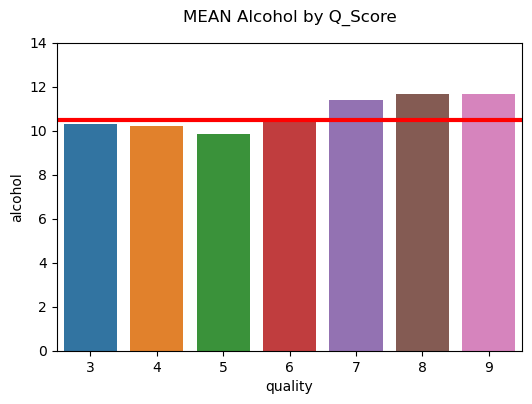

In [96]:
mean = train.alcohol.mean()
plt.figure(figsize=(6,4))
sns.barplot(data=train, y='alcohol',x='quality',ci=False)
plt.axhline(y=mean,color='red', linewidth=3)
plt.title('MEAN Alcohol by Q_Score',pad=15)
plt.ylim(0,14)
plt.show()

In [97]:
mean

10.494370818436375

# Quality8 Mean vs Overall Mean
## Does a statistically significant difference exist between mean ALCOHOL for Q8 and that of the OVERALL sample?
### T-Test Independence 1-sample, 2-tail

### Hypothesis

- ${H_0}$: No statistically significant difference exists between mean ALCOHOL for Q8 and the mean of all Q_scores.
- ${H_a}$: A statistically significant difference exists between mean ALCOHOL for Q8 and the mean of all Q_scores.

#### Two-tailed, One-Sample T-Test ANY DIFF in mean between a subset and overall

In [98]:
α = 0.05
q8_alcohol_values = train[train.quality == 8].alcohol
overall_mean = train.quality.mean()
t, p = stats.ttest_1samp(q8_alcohol_values,overall_mean)
print(t,p,α)
print(f'p = {p:e}')

44.958120101144765 3.816942971701338e-68 0.05
p = 3.816943e-68


# with a p-value of close to Zero, Reject the NULL
### A statistically significant difference exists, there is evidence to suggest that the two samples were drawn from two distinct distributions.

# Quality7 Mean vs Overall Mean
## Does a statistically significant difference exist between mean ALCOHOL for Q7 and that of the OVERALL sample?
### T-Test Independence 1-sample, 2-tail

### Hypothesis

- ${H_0}$: No statistically significant difference exists between mean ALCOHOL for Q7 and the mean of all Q_scores.
- ${H_a}$: A statistically significant difference exists between mean ALCOHOL for Q7 and the mean of all Q_scores.

#### Two-tailed, One-Sample T-Test ANY DIFF in mean between a subset and overall

In [99]:
α = 0.05
q7_alcohol_values = train[train.quality == 7].alcohol
overall_mean = train.quality.mean()
t, p = stats.ttest_1samp(q7_alcohol_values,overall_mean)
print(t,p,α)
print(f'p = {p:e}')

116.78521419474524 0.0 0.05
p = 0.000000e+00


# with a p-value of close to Zero, Reject the NULL
### A statistically significant difference exists, there is evidence to suggest that the two samples were drawn from two distinct distributions.

# Quality6 Mean vs Overall Mean
## Does a statistically significant difference exist between mean ALCOHOL for Q6 and that of the OVERALL sample?
### T-Test Independence 1-sample, 2-tail

### Hypothesis

- ${H_0}$: No statistically significant difference exists between mean ALCOHOL for Q6 and the mean of all Q_scores.
- ${H_a}$: A statistically significant difference exists between mean ALCOHOL for Q6 and the mean of all Q_scores.

#### Two-tailed, One-Sample T-Test ANY DIFF in mean between a subset and overall

In [100]:
α = 0.05
q6_alcohol_values = train[train.quality == 6].alcohol
overall_mean = train.quality.mean()
t, p = stats.ttest_1samp(q6_alcohol_values,overall_mean)
print(t,p,α)
print(f'p = {p:e}')

169.9232719362345 0.0 0.05
p = 0.000000e+00


# with a p-value of close to Zero, Reject the NULL
### A statistically significant difference exists, there is evidence to suggest that the two samples were drawn from two distinct distributions.

In [101]:
q6_alcohol_values

3919    11.8
3484     9.2
6062    12.5
1340    10.5
5296    10.2
        ... 
5571    10.3
5907    11.8
6101    11.4
1195     9.5
1955     9.0
Name: alcohol, Length: 1611, dtype: float64

# Quality4 Mean vs Overall Mean
## Does a statistically significant difference exist between mean ALCOHOL for Q4  and that of the OVERALL sample?
### T-Test Independence 1-sample, 2-tail

### Hypothesis

- ${H_0}$: No statistically significant difference exists between mean ALCOHOL for Q4 and the mean of all Q_scores.
- ${H_a}$: A statistically significant difference exists between mean ALCOHOL for Q4 and the mean of all Q_scores.

#### Two-tailed, One-Sample T-Test ANY DIFF in mean between a subset and overall

In [102]:
α = 0.05
q4_alcohol_values = train[train.quality == 4].alcohol
overall_mean = train.quality.mean()
t, p = stats.ttest_1samp(q4_alcohol_values,overall_mean)
print(t,p,α)
print(f'p = {p:e}')

50.02478959106311 1.3007265635758445e-83 0.05
p = 1.300727e-83


# with a p-value of close to Zero, Reject the NULL
### A statistically significant difference exists, there is evidence to suggest that the two samples were drawn from two distinct distributions.

## MODELING...next notebook